In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

분석 전 게임 정보
- 경매장에서 거래되는 아이템들이 다른 서버 유저와 거래 가능 -> 서버 별 df 분리 X
- 직업 별 착용 아이템이 다름 -> 직업 별로 df 분리

## 유저 정보 데이터 전처리
- 'slotId'
- 'slotName'
- 'itemId'
- 'itemName'
- 'clone_itemId'
- 'clone_itemName'


12개의 파츠 속성중 7개 속성 선정</br>


### 데이터 불러오기

In [66]:
output1 = pd.read_csv("output1.csv")
output2 =pd.read_csv("output2.csv")
output3 =pd.read_csv("output3.csv")

output = pd.concat([output1,output2,output3],ignore_index=True)

del output1,output2,output3

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9896\388457219.py:1: DtypeWarning: Columns (124,125,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  output1 = pd.read_csv("output1.csv")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9896\388457219.py:3: DtypeWarning: Columns (124,125,148,149,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  output3 =pd.read_csv("output3.csv")


In [67]:
user1 = pd.read_csv("user1.csv")
user2 =pd.read_csv("user2.csv")
user3 =pd.read_csv("user3.csv")

user = pd.concat([user1,user2,user3],ignore_index=True)
del user1,user2,user3

In [68]:
user = user[['characterId','fame']]
user

,characterId,fame
0,150a23219a59e086e36db59028c06a50,66993
1,0daa8c49cae531262f966dd637008e30,66787
2,103e5c925e8a698e89abd4d68cce1d0e,66702
3,3ba38c77f2868f34d910e362d0f4cae1,66666
4,79a62ecc85e602ae7f13b79b766aa2ee,66660
...,...,...
90595,5c37706a64742ce164d02b06456ec3d9,60468
90596,030f2b2ee126aec10bd0108c13b493c6,60468
90597,c51246ee43ee7645995bdf8f2ee1a26f,60468
90598,9c068b798696f994d39b14a0840abb10,60468


In [69]:
data = pd.merge(output, user, how = 'left')

In [70]:
data['fame'].isnull().sum()

2

In [71]:
data

,Unnamed: 0,characterId,characterName,level,jobId,jobGrowId,jobName,jobGrowName,adventureName,guildId,...,SKIN__avatar_clone_random_itemName,SKIN__avatar_clone_random_optionAbility,SKIN__avatar_clone_random_emblems_slotNo,SKIN__avatar_clone_random_emblems_slotColor,SKIN__avatar_clone_random_emblems_itemName,SKIN__avatar_clone_random_emblems_itemRarity,_error_status,_error_code,_error_message,fame
0,0,150a23219a59e086e36db59028c06a50,헤롱카테,110.0,3909d0b188e9c95311399f776e331da5,92da05ec93fb43406e193ffb9a2a629b,마법사(여),眞 인챈트리스,자색나비,ab001e5cfdc5b0669ca7219cc565c457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66993.0
1,1,0daa8c49cae531262f966dd637008e30,민트크림소스,110.0,3909d0b188e9c95311399f776e331da5,618326026de1a1f1cfba5dbd0b8396e7,마법사(여),眞 소환사,민초국밥,9f0b4ac443f5712e73eb6bcccad9717d,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66787.0
2,2,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,110.0,afdf3b989339de478e85b614d274d1ef,618326026de1a1f1cfba5dbd0b8396e7,거너(남),眞 런처,천계특수화기부대,a79e1391ef2cd5e62229cfb78138d22e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66702.0
3,3,3ba38c77f2868f34d910e362d0f4cae1,프라디지,110.0,41f1cdc2ff58bb5fdc287be0db2a8df3,6d459bc74ba73ee4fe5cdc4655400193,귀검사(남),眞 버서커,피쟁이,c19a3bbfb1340959f183d36db76c89bb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66666.0
4,4,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,110.0,0c1b401bb09241570d364420b3ba3fd7,37495b941da3b1661bc900e68ef3b2c6,프리스트(여),眞 크루세이더,13증,e37fa9b710815cb231c240a3dc93fbc1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108717,30195,5c37706a64742ce164d02b06456ec3d9,윤아에용,110.0,a7a059ebe9e6054c0644b40ef316d6e9,618326026de1a1f1cfba5dbd0b8396e7,격투가(여),眞 스트라이커,정윤아에요,0a21d7379c21af0039c47ca04ec75c35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60468.0
108718,30196,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,110.0,41f1cdc2ff58bb5fdc287be0db2a8df3,37495b941da3b1661bc900e68ef3b2c6,귀검사(남),眞 웨펀마스터,그림쟁이,9d72e476fb1dc1e50ae002712cd8c67e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60468.0
108719,30197,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,110.0,3909d0b188e9c95311399f776e331da5,92da05ec93fb43406e193ffb9a2a629b,마법사(여),眞 인챈트리스,숲속거미,c1909e07988d3fc6384e8dfa811bb0a0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60468.0
108720,30198,9c068b798696f994d39b14a0840abb10,찌뮤,110.0,b9cb48777665de22c006fabaf9a560b3,37495b941da3b1661bc900e68ef3b2c6,아처,眞 뮤즈,쪼꼬매져쪄,88e23efa4cff2f1e563b9e89711ab26e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60468.0


### 칼럼명 정의

In [5]:
name = ['HEADGEAR'
,'HAIR'
,'FACE'
,'JACKET'
,'PANTS'
,'SHOES'
,'BREAST'
,'WAIST'
,'SKIN'
,'AURORA'
,'WEAPON'
,'AURA_SKIN']

In [72]:
columns = ['characterId',
'characterName',
'jobId',
'jobName',
'HEADGEAR__avatar_slotId',
'HEADGEAR__avatar_slotName',
'HEADGEAR__avatar_itemId',
'HEADGEAR__avatar_itemName',

'HEADGEAR__avatar_clone_itemId',
'HEADGEAR__avatar_clone_itemName',

'HAIR__avatar_slotId',
'HAIR__avatar_slotName',
'HAIR__avatar_itemId',
'HAIR__avatar_itemName',

'HAIR__avatar_clone_itemId',
'HAIR__avatar_clone_itemName',

'FACE__avatar_slotId',
'FACE__avatar_slotName',
'FACE__avatar_itemId',
'FACE__avatar_itemName',

'FACE__avatar_clone_itemId',
'FACE__avatar_clone_itemName',

'JACKET__avatar_slotId',
'JACKET__avatar_slotName',
'JACKET__avatar_itemId',
'JACKET__avatar_itemName',

'JACKET__avatar_clone_itemId',
'JACKET__avatar_clone_itemName',

'PANTS__avatar_slotId',
'PANTS__avatar_slotName',
'PANTS__avatar_itemId',
'PANTS__avatar_itemName',

'PANTS__avatar_clone_itemId',
'PANTS__avatar_clone_itemName',

'SHOES__avatar_slotId',
'SHOES__avatar_slotName',
'SHOES__avatar_itemId',
'SHOES__avatar_itemName',

'SHOES__avatar_clone_itemId',
'SHOES__avatar_clone_itemName',

'BREAST__avatar_slotId',
'BREAST__avatar_slotName',
'BREAST__avatar_itemId',
'BREAST__avatar_itemName',

'BREAST__avatar_clone_itemId',
'BREAST__avatar_clone_itemName',

'WAIST__avatar_slotId',
'WAIST__avatar_slotName',
'WAIST__avatar_itemId',
'WAIST__avatar_itemName',

'WAIST__avatar_clone_itemId',
'WAIST__avatar_clone_itemName',

'SKIN__avatar_slotId',
'SKIN__avatar_slotName',
'SKIN__avatar_itemId',
'SKIN__avatar_itemName',

'SKIN__avatar_clone_itemId',
'SKIN__avatar_clone_itemName',

'AURORA__avatar_slotId',
'AURORA__avatar_slotName',
'AURORA__avatar_itemId',
'AURORA__avatar_itemName',

'AURORA__avatar_clone_itemId',
'AURORA__avatar_clone_itemName',

'WEAPON__avatar_slotId',
'WEAPON__avatar_slotName',
'WEAPON__avatar_itemId',
'WEAPON__avatar_itemName',

'WEAPON__avatar_clone_itemId',
'WEAPON__avatar_clone_itemName',

'AURA_SKIN__avatar_slotId',
'AURA_SKIN__avatar_slotName',
'AURA_SKIN__avatar_itemId',
'AURA_SKIN__avatar_itemName',

'AURA_SKIN__avatar_clone_itemId',
'AURA_SKIN__avatar_clone_itemName',
'fame']

### 칼럼명 변경

In [73]:
df = data[columns]

In [74]:
len(columns)

77

In [75]:
len(df.columns)

77

### 이상치 검색

#### 1. characterName이 없는 데이터

In [76]:
df['characterName'].isnull().sum()

2

In [77]:
for i in tqdm(range(len(df))):
    if df['characterName'].isnull()[i]:
        print(i)

21356
91838


In [78]:
df.drop([20141,78245], axis=0, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9896\2828580222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([20141,78245], axis=0, inplace=True)


>> api로 받아오는 과정 사이 캐릭터 삭제 추정 (2개) -> 데이터 삭제

### 직업별 df 분리
- '다크나이트' 와 '귀검사(남)' , '크리에이터' 와 '마법사(여)' 는 아바타를 같은 것 사용
- 오라는 직업 구분 없음


In [79]:
jobdf = df['jobName'].value_counts()
jobdf=jobdf.sort_index()
jobdf

jobName
거너(남)       6935
거너(여)       4631
격투가(남)      2551
격투가(여)      6770
귀검사(남)     11468
귀검사(여)     12593
나이트         3881
다크나이트        662
도적          2869
마법사(남)      2595
마법사(여)     15458
마창사         2089
아처         14101
총검사         2567
크리에이터        332
프리스트(남)     7298
프리스트(여)    11918
Name: count, dtype: int64

#### 직업별 분포

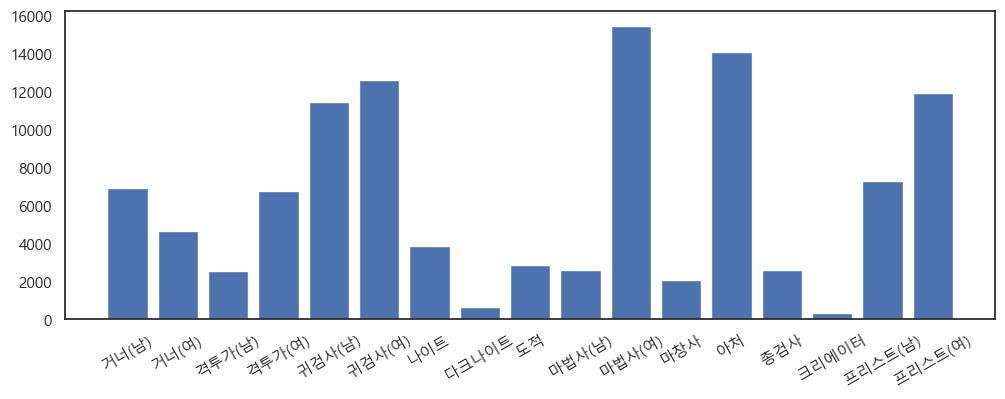

In [93]:
plt.figure(figsize=(12,4))
plt.bar(jobdf.index, jobdf.values)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.xticks(rotation=30)
plt.show()

In [91]:
df['fame'].mean()

61379.73818502916

In [85]:
df.groupby("jobName")['fame'].mean()

jobName
거너(남)      61533.667051
거너(여)      61447.459296
격투가(남)     61469.033320
격투가(여)     61379.764402
귀검사(남)     61415.753052
귀검사(여)     61382.384817
나이트        61384.808039
다크나이트      61507.980363
도적         61462.259672
마법사(남)     61432.255877
마법사(여)     61416.615992
마창사        61303.992341
아처         61248.188781
총검사        61335.764706
크리에이터      61543.945783
프리스트(남)    61369.106742
프리스트(여)    61299.696677
Name: fame, dtype: float64

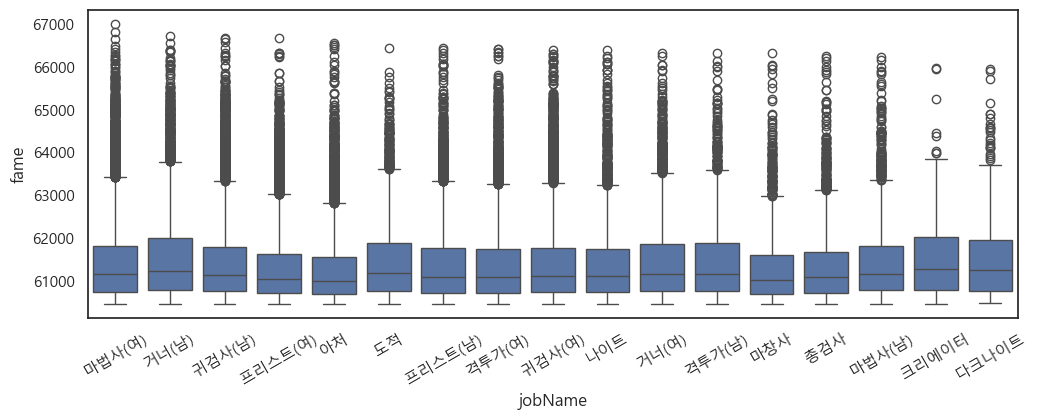

In [90]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='jobName', y='fame')
plt.xticks(rotation=30)
plt.show()

In [81]:
joblist = list(df['jobName'].unique())


거너(남) : GunnerM</br>
거너(여) : GunnerW</br>
격투가(남) : FighterM</br>
격투가(여) : FighterW</br>
귀검사(남) : Ghost KnightM</br>
귀검사(여) : Ghost KnightW</br>
나이트 : Knight</br>
다크나이트 : Dark Knight</br>
도적 : Thief</br>
마법사(남) : MageM</br>
마법사(여) : MageW</br>
마창사 : Demonic Lancer</br>
아처 : Archer</br>
총검사 : Gunblader</br>
크리에이터 : Creator</br>
프리스트(남) : PriestM</br>
프리스트(여) : PriestW</br>

In [82]:
GunnerM = df[df['jobName']=='거너(남)']
GunnerW = df[df['jobName']=='거너(여)']
FighterM = df[df['jobName']=='격투가(남)']
FighterW = df[df['jobName']=='격투가(여)']
GhostknightM = df[df['jobName']=='귀검사(남)']
GhostknightW = df[df['jobName']=='귀검사(여)']
Knight = df[df['jobName']=='나이트']
Darkknight = df[df['jobName']=='다크나이트']
Thief = df[df['jobName']=='도적']
MageM = df[df['jobName']=='마법사(남)']
MageW = df[df['jobName']=='마법사(여)']
Demoniclancer = df[df['jobName']=='마창사']
Archer = df[df['jobName']=='아처']
Gunblader = df[df['jobName']=='총검사']
Creator = df[df['jobName']=='크리에이터']
PriestM = df[df['jobName']=='프리스트(남)']
PriestW = df[df['jobName']=='프리스트(여)']

In [83]:
jobdf_list = [GunnerM,
GunnerW,
FighterM,
FighterW,
GhostknightM,
GhostknightW,
Knight,
Darkknight,
Thief,
MageM,
MageW,
Demoniclancer,
Archer,
Gunblader,
Creator,
PriestM,
PriestW,]